In [1]:
#importing the libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv("MSFT_Train.csv",index_col="timestamp",parse_dates=True)

In [3]:
dataset.head()

,open,high,low,close,volume
timestamp,,,,,
2019-01-02,99.55,101.75,98.94,101.12,35329345
2018-12-31,101.29,102.40,100.44,101.57,33173765
2018-12-28,102.09,102.41,99.52,100.39,38169312
2018-12-27,99.30,101.19,96.40,101.18,49498509
2018-12-26,95.14,100.69,93.96,100.56,51634793


In [4]:
dataset.isna().any()

open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2019-01-02 to 1998-01-02
Data columns (total 5 columns):
open      5284 non-null float64
high      5284 non-null float64
low       5284 non-null float64
close     5284 non-null float64
volume    5284 non-null int64
dtypes: float64(4), int64(1)
memory usage: 247.7 KB


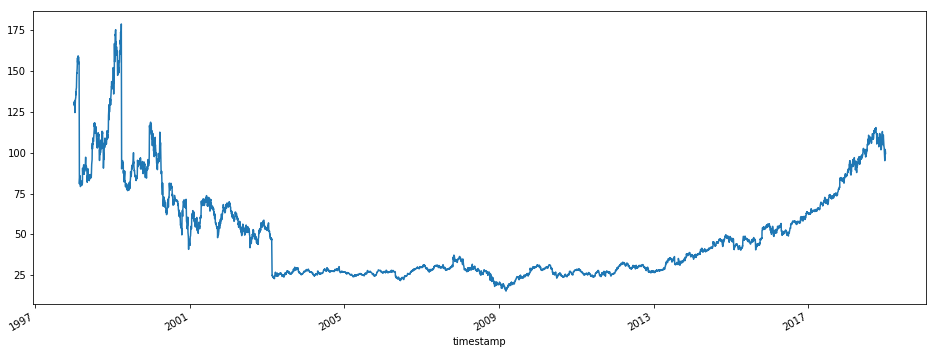

In [6]:
dataset['open'].plot(figsize=(16,6))

In [7]:
dataset.rolling(7).mean().head(20)

,open,high,low,close,volume
timestamp,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN
2018-12-24,NaN,NaN,NaN,NaN,NaN
2018-12-21,99.525714,101.344286,97.242857,99.597143,5.185471e+07
2018-12-20,100.025714,101.710000,97.220000,99.652857,5.685540e+07
2018-12-19,100.362857,102.350000,97.350000,99.955714,6.185889e+07


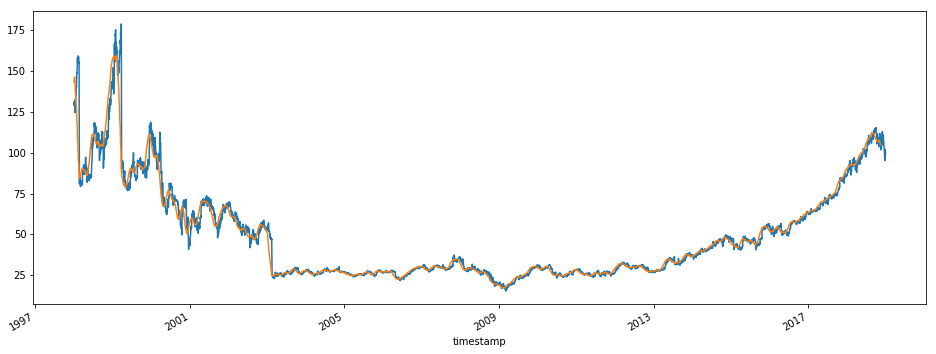

In [8]:
dataset['open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['close'].plot()

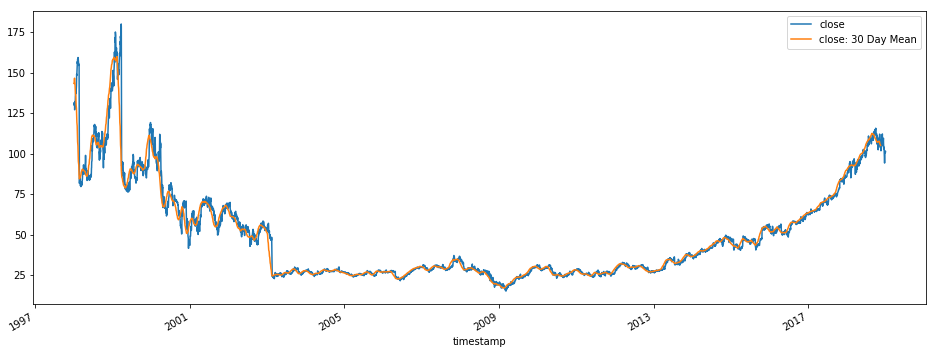

In [9]:
dataset['close: 30 Day Mean'] = dataset['close'].rolling(window=30).mean()
dataset[['close','close: 30 Day Mean']].plot(figsize=(16,6))

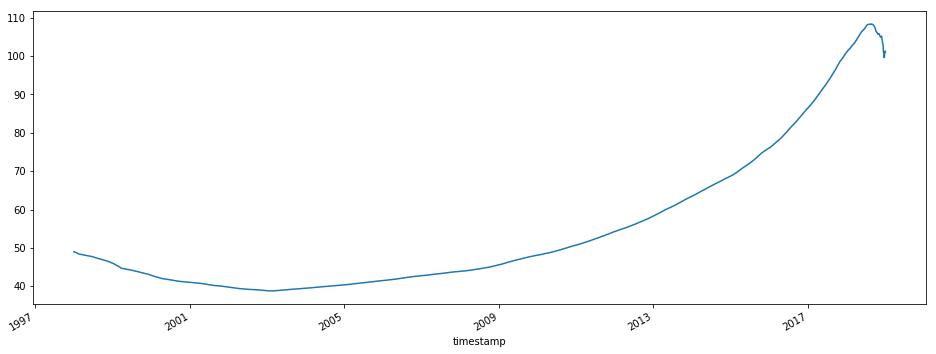

In [10]:
dataset['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [11]:
training_set = dataset['open']
training_set = pd.DataFrame(training_set)

In [12]:
dataset.isna().any()

open                  False
high                  False
low                   False
close                 False
volume                False
close: 30 Day Mean     True
dtype: bool

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
x_train = []
y_train = []
for i in range(60,1250):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'